In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
print(cancer.data.max(axis=0))

[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test,y_test))

0.9061032863849765
0.8811188811188811


In [9]:
mean_of_train = X_train.mean(axis=0)
std_of_train = X_test.std(axis=0)

X_train_scaled = (X_train - mean_of_train) / std_of_train

X_test_scaled = (X_test - mean_of_train) / std_of_train

mlp = MLPClassifier(random_state=0) 
mlp.fit(X_train_scaled,y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled,y_test))

0.9906103286384976
0.965034965034965


C:\Users\ce401Prof\bigdata\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
mlp = MLPClassifier(random_state=0, max_iter = 1000)
mlp.fit(X_train_scaled,y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled,y_test))

0.9929577464788732
0.965034965034965


In [14]:
mlp = MLPClassifier(random_state=0, max_iter = 1000, alpha=1)
mlp.fit(X_train_scaled,y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled,y_test))

0.9882629107981221
0.972027972027972


In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

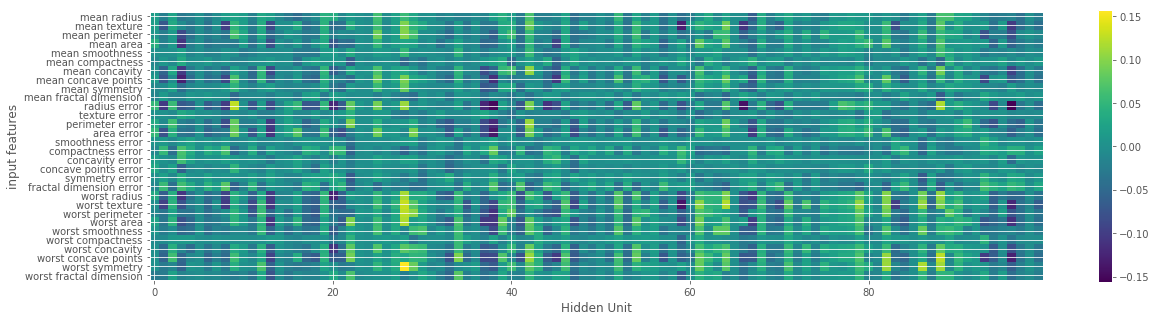

In [15]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap = 'viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Hidden Unit')
plt.ylabel('input features')
plt.colorbar()
plt.show()